In [1]:
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
notas_alumnos = pd.read_csv('notas_alumnos.csv')

In [3]:
notas_alumnos

,padron,materia,nota,fecha
0,90903,fisica,8,22/05/2016
1,91678,algebra,4,22/05/2017
2,87567,algebra,4,22/05/2017
3,93087,algebra,6,22/05/2017
4,98096,analisis,9,20/05/2016
5,93768,analisis,10,22/05/2018
6,91678,numerico,8,22/09/2016
7,93087,numerico,4,22/09/2018
8,90287,algebra,4,22/10/2019
9,90903,algebra,4,22/10/2017


In [4]:
notas_alumnos.describe()

,padron,nota
count,14.000000,14.000000
mean,92626.928571,6.357143
std,2840.282962,2.205139
min,87567.000000,4.000000
25%,91096.750000,4.000000
50%,91678.000000,6.500000
75%,93597.750000,8.000000
max,98096.000000,10.000000


In [7]:
notas_alumnos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   padron   14 non-null     int64 
 1   materia  14 non-null     object
 2   nota     14 non-null     int64 
 3   fecha    14 non-null     object
dtypes: int64(2), object(2)
memory usage: 576.0+ bytes


In [9]:
number_of_subjects = notas_alumnos['materia'].value_counts()

In [10]:
number_of_subjects

 algebra         5
 numerico        3
 analisis        2
 quimica         2
 programacion    1
 fisica          1
Name: materia, dtype: int64

In [20]:
short_notas = notas_alumnos[['materia','nota']]
short_notas

,materia,nota
0,fisica,8
1,algebra,4
2,algebra,4
3,algebra,6
4,analisis,9
5,analisis,10
6,numerico,8
7,numerico,4
8,algebra,4
9,algebra,4


In [31]:
group_by_materias = short_notas.groupby('materia').aggregate('mean')
group_by_materias.columns = ['nota_promedio']
group_by_materias

,nota_promedio
materia,
algebra,4.400000
analisis,9.500000
fisica,8.000000
numerico,6.333333
programacion,7.000000
quimica,7.000000


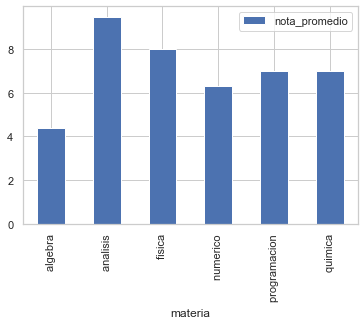

In [32]:
group_by_materias.plot(kind='bar')

In [33]:
grouped_by_padron = notas_alumnos.groupby('padron')

In [37]:
grouped_by_padron.describe()

nota                                                
       count  mean       std   min    25%   50%    75%   max
padron                                                      
87567    1.0   4.0       NaN   4.0   4.00   4.0   4.00   4.0
90287    1.0   4.0       NaN   4.0   4.00   4.0   4.00   4.0
90903    2.0   6.0  2.828427   4.0   5.00   6.0   7.00   8.0
91678    4.0   6.0  1.825742   4.0   4.75   6.0   7.25   8.0
93087    2.0   5.0  1.414214   4.0   4.50   5.0   5.50   6.0
93768    1.0  10.0       NaN  10.0  10.00  10.0  10.00  10.0
94271    1.0   7.0       NaN   7.0   7.00   7.0   7.00   7.0
98096    2.0   9.0  0.000000   9.0   9.00   9.0   9.00   9.0

In [58]:
notas_por_padron = grouped_by_padron.describe()
notas_por_padron.columns = notas_por_padron.columns.map('_'.join)
notas = notas_por_padron [['nota_count','nota_mean','nota_min','nota_max']]
notas.columns = ['cantidad_de_notas','promedio_de_notas','nota_minima','nota_maxima']
notas
#otra forma de aplanar los indices superiores es renombrando las columnas. Aca no lo hice porque necesitaba eliminar algunas 
#columnas primero

,cantidad_de_notas,promedio_de_notas,nota_minima,nota_maxima
padron,,,,
87567,1.0,4.0,4.0,4.0
90287,1.0,4.0,4.0,4.0
90903,2.0,6.0,4.0,8.0
91678,4.0,6.0,4.0,8.0
93087,2.0,5.0,4.0,6.0
93768,1.0,10.0,10.0,10.0
94271,1.0,7.0,7.0,7.0
98096,2.0,9.0,9.0,9.0


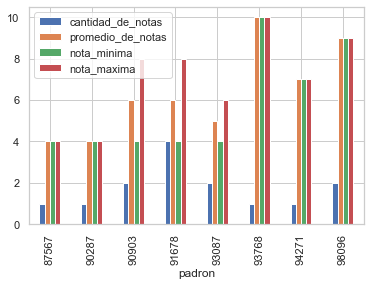

In [103]:
notas.plot(kind='bar')

In [113]:
#notas_alumnos.drop(columns='eliminar',inplace = True)
notas_alumnos.drop(columns='anio_rendido',inplace = True)
notas_alumnos
#notas_alumnos.dtypes
#notas_alumnos['fecha'] = pd.to_datetime(notas_alumnos['fecha'])

C:\Users\Ron Heyes\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,padron,materia,nota,fecha
0,90903,fisica,8,2016-05-22
1,91678,algebra,4,2017-05-22
2,87567,algebra,4,2017-05-22
3,93087,algebra,6,2017-05-22
4,98096,analisis,9,2016-05-20
5,93768,analisis,10,2018-05-22
6,91678,numerico,8,2016-09-22
7,93087,numerico,4,2018-09-22
8,90287,algebra,4,2019-10-22
9,90903,algebra,4,2017-10-22


In [115]:
notas_alumnos
notas_alumnos ['anio_rendido'] = notas_alumnos ['fecha'].dt.year

TypeError: only integer scalar arrays can be converted to a scalar index

In [101]:
notas_alumnos

,padron,materia,nota,fecha,anio_rendido,eliminar
0,90903,fisica,8,2016-05-22,2016,2017
1,91678,algebra,4,2017-05-22,2017,2017
2,87567,algebra,4,2017-05-22,2017,2017
3,93087,algebra,6,2017-05-22,2017,2017
4,98096,analisis,9,2016-05-20,2016,2017
5,93768,analisis,10,2018-05-22,2018,2017
6,91678,numerico,8,2016-09-22,2016,2017
7,93087,numerico,4,2018-09-22,2018,2017
8,90287,algebra,4,2019-10-22,2019,2017
9,90903,algebra,4,2017-10-22,2017,2017


In [70]:
notas_alumnos['anio_en_que rindio'].value_counts()

2017    5
2018    3
2016    3
2019    2
2015    1
Name: anio_en_que rindio, dtype: int64

In [99]:
notas_alumnos['anio_en_que rindio'].value_counts().plot(kind='bar')

KeyError: 'anio_en_que rindio'

In [98]:
#CANTIDAD DE MATERIAS QUE APROBO CADA ALUMNO
notas_alumnos ['padron'].value_counts().plot(kind = 'pie')

TypeError: only integer scalar arrays can be converted to a scalar index

In [89]:
notas_alumnos.columns = [['padron', 'materia','nota','fecha','anio_rendido','eliminar']]

In [90]:
notas_alumnos

,padron,materia,nota,fecha,anio_rendido,eliminar
0,90903,fisica,8,2016-05-22,2016,2017
1,91678,algebra,4,2017-05-22,2017,2017
2,87567,algebra,4,2017-05-22,2017,2017
3,93087,algebra,6,2017-05-22,2017,2017
4,98096,analisis,9,2016-05-20,2016,2017
5,93768,analisis,10,2018-05-22,2018,2017
6,91678,numerico,8,2016-09-22,2016,2017
7,93087,numerico,4,2018-09-22,2018,2017
8,90287,algebra,4,2019-10-22,2019,2017
9,90903,algebra,4,2017-10-22,2017,2017


In [97]:
#anio_2017 = notas_alumnos.loc[notas_alumnos['anio_rendido'] > '2017']
#rslt_df = notas_alumnos.loc[notas_alumnos['padron'] > 80] 
#notas_alumnos.loc[notas_alumnos['anio_rendido'] == 2017]
notas_alumnos['anio_rendido'].value_counts()
#EJERCICIO TERMINADO

TypeError: only integer scalar arrays can be converted to a scalar index